In [1]:
"""
합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위해 
합성곱 층의 가중치와 특성 맵을 그림으로 시각화

함수형 API가 무엇인지 살펴보고 합성곱 층의 특성 맵을 시각화 하는데 사용

- 가중치 시각화

합성곱 츠은 여러 개의 필터를 사용해 이미지에서 특징을 학습함 
각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다
일반적으로 절편은 시각적으로 의미가 있지 않습니다
가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할

2절에서 만든 모델이 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일을 읽어 드림
"""
from tensorflow import keras
model = keras.models.load_model("best-cnn-model.h5")

In [2]:
"""
model.layers를 출력
"""
model.layers

In [3]:
"""
첫 번째 합성곱 층의 가중치를 조사해 보자 
층의 가중치와 절편은 층의 weights 속성에 저장되어 있다
weights도 파이썬 리스트 
layers 속성의 첫 번째 원소를 선택해 weights의 첫 번째 원소(절편)와 두번째 원소(절편)의 크기를 출력

커널 크기를(3,3)으로 지정해둠

합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3, 3, 1)임
또 필터 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는 (3, 3, 1, 32)가 됨
weights의 두 번째 원소는 절편의 개수를 나타냄
필터마다 1개의 절편이 있으므로(32,) 크기가 됨
"""
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [4]:
"""
weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체
여기서는 다루기 쉽도롭 numpy()메서드를 사용해 넘파이 배열로 변환
그다음 가중치 배열의 평균과 표준편차를 넘파이 mean()메서드와 std()메서드로 계산
"""
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02554771 0.24385099


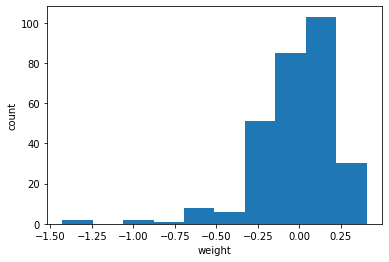

In [5]:
"""
이 가중치의 평균값은 0에 가깝고 표준편차는 0.27 정도 입니다
나중에 이 값을 훈련하기 전의 가중치와 비교해 봄
이 가중치가 어떤 분포를 가졌는지 직관적으로 이해하기 쉽도록 히스토그램을 그려봄

matplotlib의 hist()함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야함
이를 위해 넘파이 reshape 메서드로 conv_weights 배열을 1개의 열이 있는 배열로 변환
"""
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

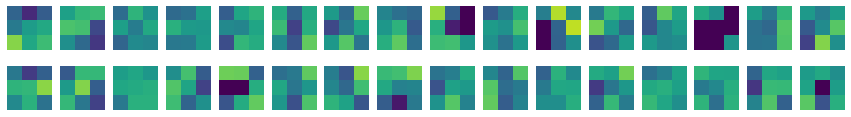

In [6]:
"""
히스토그램을 보면 0을 중심으로 모여있다 
이 가중치가 무엇을 의미를 학습한것인지는 나중에 나옴

이번에는 32개의 커널을 16개씩 두 줄에 출력해 봄 
이전 장에서 사용했던 맷플롯립의 subplots() 함수를 사용해 32개의 그래프 영역을 만들고 
순서대로 커널을 출력

책이랑 다른 모습인 32개의 가중치 모습
그래도 의미가 있다 모습만 다를뿐
"""
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis("off")

plt.show()

In [8]:
"""
이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어 봄
이 합성곱 층의 가중치가 위에서 본 훈련한 가중치와 
어떻게 다른지 그림으로 비교
먼저 Sequential 클래스로 모델을 만들고 Conv2D층을 하나 추가
"""
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)))

In [9]:
"""
그다음 이 모델의 첫 번째 층(즉 Conv2D층)의 가중치를 no_training_conv 변수에 저장
"""
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
"""
이 가중차의 크기도 앞서 그래프로 출력한 가중치와 같습니다
동일하게 (3, 3)커널을 가진 필터를 32개 사용했기 때문
이 가중치의 평균과 표준편차를 확인해 보겠습니다
이전처럼 먼저 넘파이 배열로 만든 다음 mean(), std()메서드로 호출함
"""
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0064348076 0.08063365


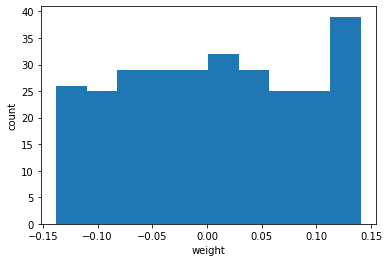

In [11]:
"""
이 가중치 배열을 히스토그램으로 표현

대부분의 가중치가 전체적으로 고르게 분포한 모습
텐서플로가 신경망의 가중치를 처음 초기화 할때 균등 분포에서 랜덤하게 값을 선택함
"""
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

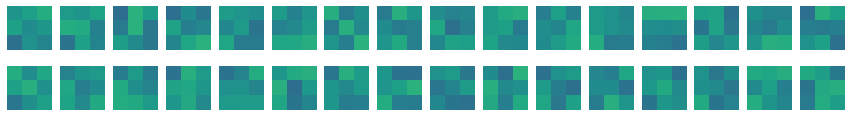

In [12]:
"""
이 가중치 값을 맷플롯립의 imshow()함수를 사용해 이전처럼 그림으로 출력해 봄
학습된 가중치와 비교하기 위해 동일하게 vmin과 vmax를 -0.5와 0.5로 설정

확실히 가중치의 모습이 전체적으로 특징이 없이 밋밋하게 균등하게 초기화 된 모습

훈련이 끝난 이전 가중치와 비교해보면 
합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 
유용한 패턴을 학습했다는 사실을 알수 있다
"""
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis("off")
        
plt.show()

In [14]:
"""
- 함수형 API

함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만듭니다 
간단한 예를 보면 7 장에서 만든 Dense층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현
"""
dense1 = keras.layers.Dense(100, activation="sigmoid")
dense2 = keras.layers.Dense(10, activation="softmax")

In [16]:
"""
이 객체를 Sequential 클래스 객체의 add()메서드에 전달할 수 있다
하지만 다음과 같이 함수처럼 호출할 수도 있다

hidden = dense1(inputs)

파이썬의 모든 객체는 호출 가능함
케라스의 층은 객체를 함수처럼 호출했을 때 
적절히 동작할 수 있도록 미리 준비해 놓았습니다
앞의 코드를 실행하면 영리하게도 입력값 inputs를 Dense층에 통과시킨 후 출력값 hidden을 만들어 줌

이제 왜 함수형 API라고 부르는지 이해했을 것 같네요 
그다음 두 번째 층을 호출함
이때는 첫 번째 층의 출력을 입력으로 사용

outputs = dense2(hidden)
그다음 inputs와 outputs을 Model 클래스로 연결해 주면 됨

model = keras.Model(inputs, outputs)

model 클래스에서는 우리가 수동으로 만들어서 호출해야함 
바로 inputs가 InputLayer 클래스의 출력값이 되어야 함

다행히 케라스는 InputLayer 클래스 객체를 쉽게 다룰 수 있도록 Input()함수를 별도로 제공함
입력의 크기를 지정하는 shape 매개변수와 함께 이 함수를 호출하면 InputLayer 클래스 객체를 만들어
출력을 반환해 줌

inputs= keras.Input(shape=(784,))

마치 체인처럼 입력에서 출력까지 연결하고 마지막 model 클래스에 입력과 출력을 지정하여 
모델을 만듭니다 이렇게 모델을 만들게 되면 중간에 다양한 형태로 층을 연결할 수 있따

그런데 특성 맵 시각화를 만드는 데 함수형 API가 왜 필요한 것일까? 2절에서 정의한 model 객체의 층을
순서대로 나열하면 다음과 같다

model 객체의 predict()메서드를 호출하면 입력부터 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환
하지만 우리가 필요한 것은 첫 번째 Conv2D 층이 출력한 특성 맵입니다
첫번쨰 층의 출력은 Conv2D 객체의 output속성에서 얻을 수 있습니다
model.layers[0].output처럼 참조할 수 있다
model 객체의 입력은 어떻게 얻을 수 있을까? 다행히 케라스 모델은 input 속성으로 입력을 참조 할 수 있다
즉 model.input으로 이 모델의 입력을 간단히 얻을 수 있습니다
"""
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [17]:
"""
이제 model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다

model 객체의 predict()메서드를 호출하면 최종 출력층의 확률을 반환함
하지만 conv_acti의 predict 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환함
이렇게 함수형 API를 설명함

특성 맵을 시각화를해보자
"""
conv_acti = keras.Model(model.input, model.layers[0].output)

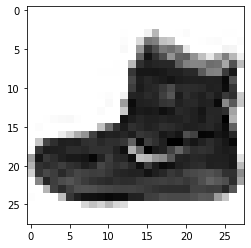

In [18]:
"""
- 특성 맵 시각화
케라스로 패션 MNIST 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플을 그려봄
"""
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [19]:
"""
그다음에 (784,) 크기를 (28, 28, 1)크기로 변경하고 255로 나눔
"""
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [20]:
"""
conv_acti.predict() 메서드가 출력한 feature_maps
의 크기를 확인
세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28, 28, 32)임
첫 번째 차원은 배치 차원이라는 점을 기억
샘플을 하나 입력했기 때문에 1이 됨
"""
print(feature_maps.shape)

(1, 28, 28, 32)


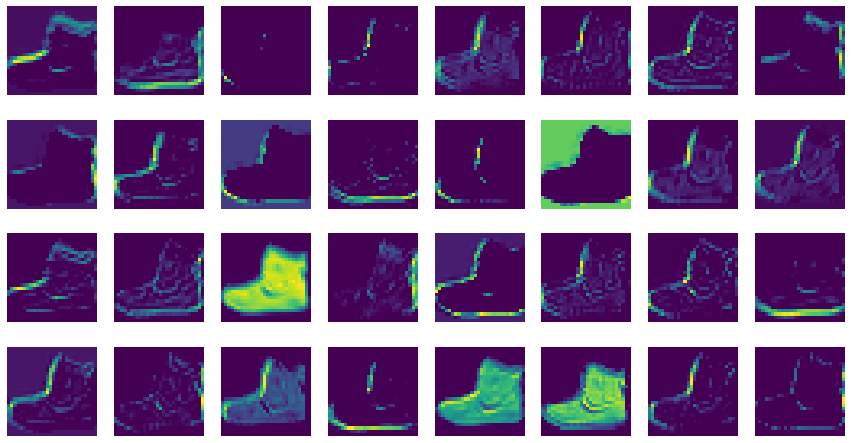

In [21]:
"""
이제 앞에서와 같이 맷플롭립의 imshow함수로 이 특성 맵을 그려봄
총 32개의 특성 맵이 있으므로 4개의 행으로 나누어 그림

설명은 책을 보자 
"""
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,: , i*8 + j])
        axs[i, j].axis("off")

plt.show()

In [22]:
"""
두 번쨰 합성곱 층이 만든 특성 맵도 같은 방식으로 확인할 수 있다
먼저 model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델을 만듬
"""
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [23]:
"""
그다음 첫 번째 샘플을 conv2_acti 모델의 predict()메서드에 전달
"""
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/ 255.0
feature_maps = conv2_acti.predict(inputs)

In [24]:
"""
첫 번쨰 풀링 층에서 가로세로 크기가 절반으로 줄었고, 두번째 합성곱층의 필터 개수는 64개 이므로
feature_maps의 크기는 배치 차원을 제외하면(14, 14, 64)일 것
확인해보자
"""
print(feature_maps.shape)

(1, 14, 14, 64)


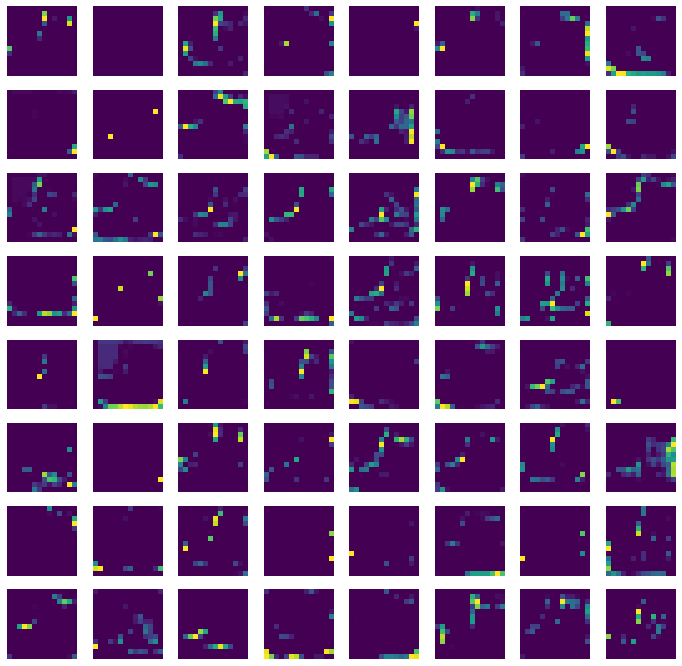

In [25]:
"""
64개의 특성 맵을 8개씩 나누어 imshow()함수로 그려봄

이 특성맵은 시각적으로 이해하기 어려움

합성곱 신경망의 앞부분에 있는 합성곱 츠은 이미지의 시각적인 정보를 감지하고 
뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼수 있다
"""
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i , j].imshow(feature_maps[0,: , :, i*8 + j])
        axs[i, j].axis("off")
plt.show()